In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

In [ ]:
salary = pd.read_csv('salary_dataset.csv', na_values = '<NA>')
#размер датафрейма
salary.shape

(6704, 9)

In [ ]:
salary

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


По общей информации можно заметить, что типы данных соответствуют информации в столбцах, единственное, столбец Age можно привести к типу int, т.к. данные целочисленные.

Также видно, что имеются пропуски в столбцах.

In [ ]:
salary['Age'] = salary['Age'].astype('Int64')
salary['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6704 entries, 0 to 6703
Series name: Age
Non-Null Count  Dtype
--------------  -----
6702 non-null   Int64
dtypes: Int64(1)
memory usage: 59.0 KB


In [ ]:
#Базовые статистики
salary.drop('Unnamed: 0',axis=1).describe()

,Age,Years of Experience,Salary
count,6702.0,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.0,0.000000,350.000000
25%,28.0,3.000000,70000.000000
50%,32.0,7.000000,115000.000000
75%,38.0,12.000000,160000.000000
max,62.0,34.000000,250000.000000


2 Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Анализ выбросов в столбце Age

In [ ]:
#в общей информации по столбцу видно, что в нем присутствуют 2 пропуска, поэтому дальше считаем выбросы, не учитывая пропуски
sal_nona = salary.dropna(subset='Age')
q1 = sal_nona['Age'].quantile(0.25)
q3 = sal_nona['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
sal_nona[~sal_nona['Age'].between(lower_bound, upper_bound, inclusive='both')]

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1211,1211,61,Male,PhD,Software Engineer Manager,20.0,200000.0,UK,Welsh
1223,1223,57,Male,PhD,Software Engineer Manager,18.0,195000.0,China,White
1225,1225,62,Male,PhD,Software Engineer Manager,19.0,200000.0,UK,White
1236,1236,62,Male,PhD,Software Engineer Manager,20.0,200000.0,China,Korean
1240,1240,55,Male,PhD,Software Engineer Manager,17.0,190000.0,USA,African American
...,...,...,...,...,...,...,...,...,...
3058,3058,54,Male,Master's Degree,Senior Software Engineer,32.0,195270.0,Canada,Asian
3067,3067,54,Male,Bachelor's Degree,Full Stack Engineer,25.0,179756.0,UK,Mixed
3084,3084,54,Female,PhD,Software Engineer Manager,32.0,191510.0,China,Chinese
3104,3104,54,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia,Australian


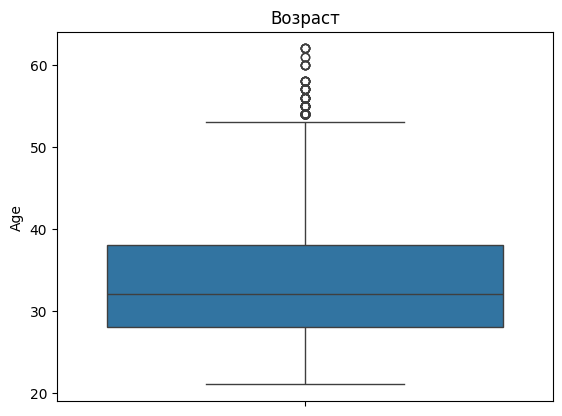

In [ ]:
sns.boxplot(data=sal_nona['Age'])
plt.title("Возраст")
plt.show()

По полученным данным и диаграмме с усами видно, что за выбросы принимаются люди возрастом немного больше 50-ти лет и старше. Думаю, что в данном случае это связано с тем, что в датасете бОльшее количество данных на людей среднего возраста 28-38 лет. Поэтому и получается, что, относительно средних значений, данные 50+ лет выходят за пределы вычисленных границ.

Анализ выбросов в столбце Years of Experience

In [ ]:
years_nona = salary.dropna(subset='Years of Experience')
q1 = years_nona['Years of Experience'].quantile(0.25)
q3 = years_nona['Years of Experience'].quantile(0.75)
iqr2 = q3 - q1
lower_bound = q1 - (1.5 * iqr2)
upper_bound = q3 + (1.5 * iqr2)
years_nona[~years_nona['Years of Experience'].between(lower_bound, upper_bound, inclusive='both')]

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2378,2378,53,Other,High School,Senior Project Engineer,31.0,166109.0,Canada,White
2387,2387,57,Female,PhD,Full Stack Engineer,30.0,121450.0,Australia,Australian
2392,2392,52,Female,Master's Degree,Senior Software Engineer,28.0,186963.0,Australia,Australian
2396,2396,60,Female,PhD,Software Engineer Manager,33.0,179180.0,China,White
2398,2398,58,Male,Master's Degree,Senior Software Engineer,27.0,190004.0,China,White
...,...,...,...,...,...,...,...,...,...
3076,3076,52,Male,PhD,Software Engineer Manager,26.0,185982.0,Canada,Asian
3084,3084,54,Female,PhD,Software Engineer Manager,32.0,191510.0,China,Chinese
3104,3104,54,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia,Australian
3120,3120,54,Male,PhD,Software Engineer Manager,28.0,182013.0,USA,African American


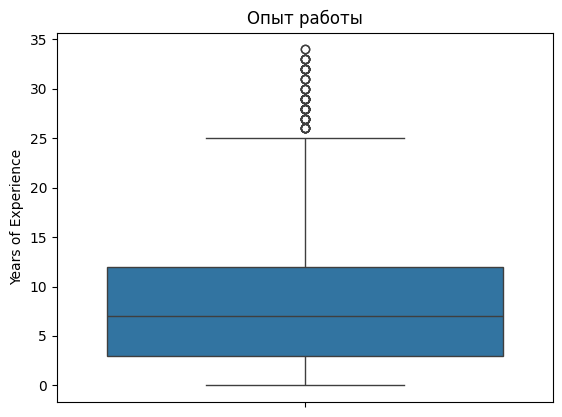

In [ ]:
sns.boxplot(data=years_nona['Years of Experience'])
plt.title("Опыт работы")
plt.show()

Так как на предыдущем шаге было выявлено, что работников 50+ меньшинство, то логично, что выбросами в столбце с опытом работы будут считаться также большие значения. Чем старше человек - тем больше его опыт. И в данном случае выбросами считается стаж работы > 25 лет.

Анализ выбросов в столбце Salary

In [ ]:
money = salary.dropna(subset='Salary')
q1 = money['Salary'].quantile(0.25)
q3 = money['Salary'].quantile(0.75)
iqr3 = q3 - q1
lower_bound = q1 - (1.5 * iqr3)
upper_bound = q3 + (1.5 * iqr3)
money[~money['Salary'].between(lower_bound, upper_bound, inclusive='both')]

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race


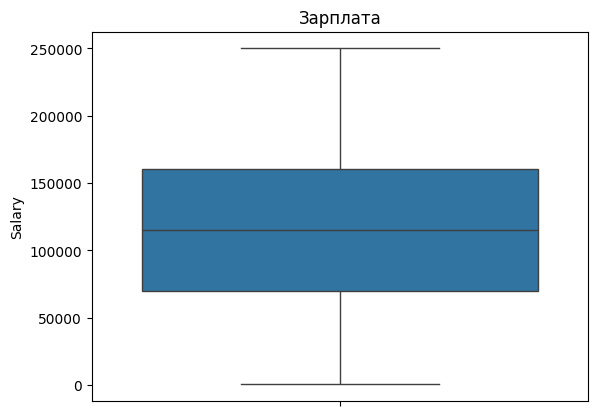

In [ ]:
sns.boxplot(data=money['Salary'])
plt.title("Зарплата")
plt.show()

В данном случае мы не получили никакой информации о выбросах, так как все значения входят область между верней и нижней границей интервала.

3 Заполнение пропусков

In [ ]:
(salary.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.03
Gender                 0.03
Education Level        0.04
Job Title              0.03
Years of Experience    0.04
Salary                 0.07
Country                0.00
Race                   0.00
dtype: float64

В столбцах Age, Gender, Education Level, Job Title, Years of Experience, Salary присутствуют пропуски.

Предполагаем, что возраст можно оценить по стажу работы. А стаж работы по занимаемой должности.

In [ ]:
salary.groupby('Job Title')['Years of Experience'].median()

Job Title
Account Manager              5.0
Accountant                   4.0
Administrative Assistant     9.0
Back end Developer           5.0
Business Analyst             6.0
                            ... 
UX Designer                  5.0
UX Researcher                2.0
VP of Finance               19.0
VP of Operations            19.0
Web Developer                4.0
Name: Years of Experience, Length: 193, dtype: float64

По группировке видно, что предположение "стаж работы-занимаемая должность" справедливо. Чем больше стаж, тем серьезнее должность у человека; а малый стаж также встречается еще у людей, работающих на "новых" специальностях, к примеру, UX-дизайнеры, аналитики данных

In [ ]:

salary["Years of Experience"] = salary["Years of Experience"].fillna(salary.groupby(by="Job Title")["Years of Experience"].transform('median'))

Предполагаем, что пропуски в столбце с полом можно заполнить по уровню образования

In [ ]:
salary.groupby('Education Level')['Gender'].agg(pd.Series.mode)

Education Level
Bachelor's             Male
Bachelor's Degree      Male
High School          Female
Master's             Female
Master's Degree      Female
PhD                    Male
phD                    Male
Name: Gender, dtype: object

In [ ]:
salary['Gender'] = salary['Gender'].fillna(salary.groupby('Education Level')['Gender'].transform(lambda x: x.mode()[0]))

(salary.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.03
Gender                 0.03
Education Level        0.04
Job Title              0.03
Years of Experience    0.04
Salary                 0.07
Country                0.00
Race                   0.00
exp_group              0.04
dtype: float64

In [ ]:
salary['Age'] = salary['Age'].fillna(salary['Age'].median())
salary['Gender'] = salary['Gender'].fillna(salary['Gender'].mode()[0])

Гипотеза: Чем старше человек, тем больше у него стаж работы

In [ ]:
salary.groupby('Age')['Years of Experience'].median().head(15)

Age
21    0.0
22    0.0
23    1.0
24    1.0
25    1.0
26    2.0
27    3.0
28    3.0
29    4.0
30    5.0
31    6.0
32    7.0
33    8.0
34    9.0
35    9.0
Name: Years of Experience, dtype: float64

Гипотеза подтверждается, наглядно видно, что с возрастом стаж работы растет, поэтому заменим пропуски в столбце со стажем работы на медианные значения по группам

In [ ]:
salary["Years of Experience"] = salary["Years of Experience"].fillna(salary.groupby(by="Age")["Years of Experience"].transform('median'))

Снова предполагаем, что занимаемая должность зависит от стажа работы. Чем дольше работает сотрудник, тем серьезнее у него должность

In [ ]:
salary.groupby('Years of Experience')['Job Title'].agg(lambda x: x.mode()[0] if x.count() != 0 else "unknown").head(10)

Years of Experience
0.0                             Receptionist
0.5                 Junior Marketing Analyst
1.0                   Junior Sales Associate
1.5    Junior Business Development Associate
2.0                             Data Analyst
3.0                        Software Engineer
4.0                        Software Engineer
5.0                        Software Engineer
6.0                      Full Stack Engineer
7.0                          Product Manager
Name: Job Title, dtype: object

In [ ]:
salary['Job Title'] = salary['Job Title'].fillna(salary.groupby('Years of Experience')['Job Title'].transform(lambda x: x.mode()[0]))

Уровень образования должен зависеть от занимаемой должности

In [ ]:
salary.groupby('Job Title')['Education Level'].agg(lambda x: x.mode()[0] if x.count() != 0 else "unknown")

Job Title
Account Manager                    Bachelor's
Accountant                         Bachelor's
Administrative Assistant           Bachelor's
Back end Developer          Bachelor's Degree
Business Analyst                   Bachelor's
                                  ...        
UX Designer                          Master's
UX Researcher                        Master's
VP of Finance                        Master's
VP of Operations                     Master's
Web Developer               Bachelor's Degree
Name: Education Level, Length: 193, dtype: object

In [ ]:
salary['Education Level'] = salary['Education Level'].fillna(salary.groupby('Job Title')['Education Level'].transform(lambda x: x.mode()[0] if x.count() != 0 else "unknown"))

Предполагаю, что уровень зарплаты зависит, в большей степени, от стажа работы и занимаемой должности. Тут для наглядности добавим еще 1 столбец со стажем работы: 0-10, 11-20, 21-30, 31-34 (34-максимум)

In [ ]:
salary.loc[(salary['Years of Experience'] >=0) & (salary['Years of Experience'] <=10), 'exp_group'] = '0-10 y'
salary.loc[(salary['Years of Experience'] >=11) & (salary['Years of Experience'] <=20), 'exp_group'] = '11-20 y'
salary.loc[(salary['Years of Experience'] >=21) & (salary['Years of Experience'] <=30), 'exp_group'] = '21-30 y'
salary.loc[(salary['Years of Experience'] >=31) & (salary['Years of Experience'] <=34), 'exp_group'] = '31-34 y'

In [ ]:
salary.groupby(['exp_group', 'Job Title'])['Salary'].median()

exp_group  Job Title                
0-10 y     Account Manager               75000.0
           Accountant                    55000.0
           Administrative Assistant      50000.0
           Back end Developer            94502.0
           Business Analyst              77500.0
                                          ...   
21-30 y    Supply Chain Analyst         130000.0
31-34 y    Full Stack Engineer          188232.0
           Senior Project Engineer      166109.0
           Senior Software Engineer     195270.0
           Software Engineer Manager    191267.0
Name: Salary, Length: 262, dtype: float64

Гипотеза подтвердилась, можно заметить между некоторыми позициями разных групп разницу > чем в 10 раз

In [ ]:
salary["Salary"] = salary["Salary"].fillna(salary.groupby(['exp_group', 'Job Title'])["Salary"].transform('median'))
(salary.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.00
Gender                 0.00
Education Level        0.00
Job Title              0.00
Years of Experience    0.00
Salary                 0.01
Country                0.00
Race                   0.00
exp_group              0.00
dtype: float64

Из-за ненулевого значения пропуска Salary, упросим группировку только до стажа работы

In [ ]:
salary.groupby(['exp_group'])['Salary'].median()

exp_group
0-10 y      85000.0
11-20 y    170000.0
21-30 y    182237.0
31-34 y    191267.0
Name: Salary, dtype: float64

Особенно сильно видна разницы в зарплате между начинающими специалистами и опытными

In [ ]:
salary["Salary"] = salary["Salary"].fillna(salary.groupby(['exp_group'])["Salary"].transform('median'))
(salary.isna().mean() * 100).round(2)

Unnamed: 0             0.0
Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
Country                0.0
Race                   0.0
exp_group              0.0
dtype: float64

3 Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически

***В наборе данных больше информации о мужчинах или о женщинах?***

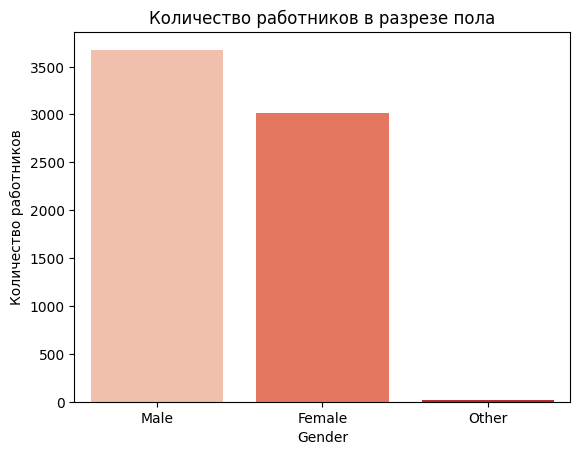

In [ ]:
sns.countplot(data=salary, x="Gender", hue="Gender", palette= "Reds")
plt.title("Количество работников в разрезе пола")
plt.ylabel("Количество работников")
plt.show()

Да, действительно в данных больше информации о работниках-мужчинах, но также присутствуют еще данные о "дргуих" гендерах

***Чем больше возраст, тем больше стаж работы?***

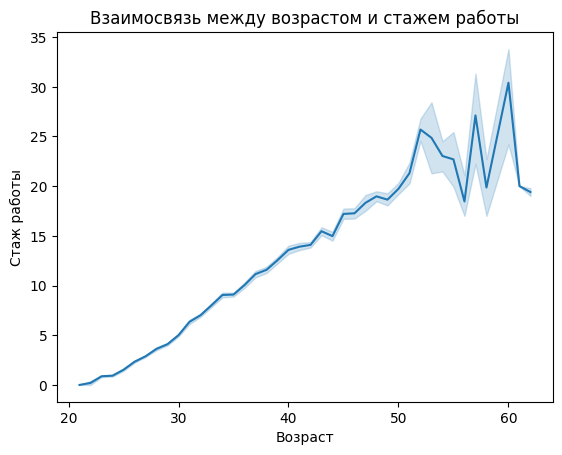

In [ ]:
sns.lineplot(data=salary, x="Age", y="Years of Experience");

plt.title("Взаимосвязь между возрастом и стажем работы")
plt.ylabel("Стаж работы")
plt.xlabel("Возраст")
plt.show()

По графику мы видим четко прослеживающуюся линейную зависимость примерно до 50 лет возраста и 25 лет стажа (это как раз те значения, от которых уже начинаются выбросы в датасете). То есть гипотеза о том, что чем старше человек, тем больше у него опыт работы подтверждается.

***Зависит ли размер зарплаты от страны проживания?***

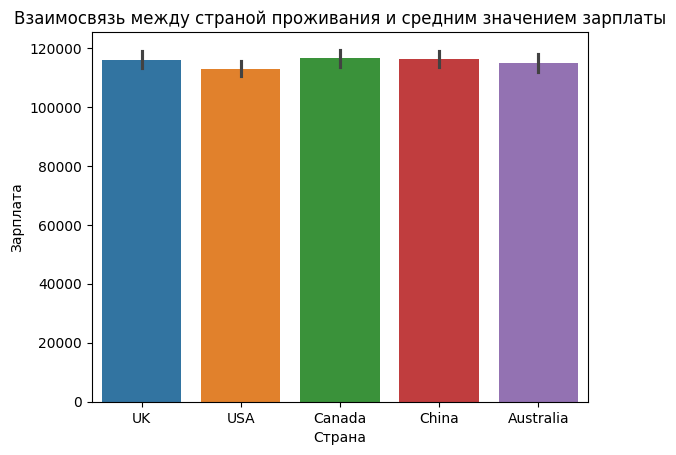

In [ ]:
sns.barplot(data=salary, x="Country", y="Salary", hue = "Country")
plt.title("Взаимосвязь между страной проживания и средним значением зарплаты")
plt.ylabel("Зарплата")
plt.xlabel("Страна")
plt.show()

Можно наблюдать, что средние значения зарплат практически не отличаются по странам проживания

Ниже видно, что один и тот же уровень образования в наборе данных может называться по-разному. Приведем для дальнейшего удобства к одному виду

In [ ]:
salary['Education Level'].value_counts()

Bachelor's Degree    2269
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
unknown                 1
phD                     1
Name: Education Level, dtype: int64

In [ ]:
salary['Education Level'] = salary['Education Level'].replace("phD", "PhD")
salary['Education Level'] = salary['Education Level'].replace("Master's Degree", "Master's")
salary['Education Level'] = salary['Education Level'].replace("Bachelor's Degree", "Bachelor's")
salary['Education Level'].value_counts()

Bachelor's     3025
Master's       1861
PhD            1369
High School     448
unknown           1
Name: Education Level, dtype: int64

***Большинство сотрудников имеют высшее образование?***

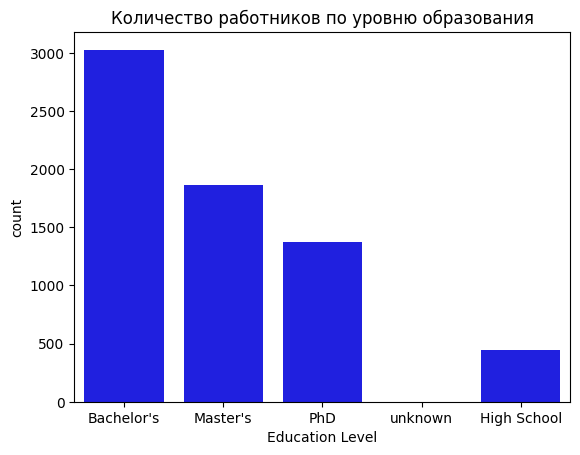

In [ ]:
sns.countplot(data=salary, x="Education Level", color="blue")
plt.title("Количество работников по уровню образования")
plt.show()

Да, у большинства сотрудников имеется степень бакалавра и выше

***Есть ли корреляция между возрастом, стажем и размеров зарплаты?***

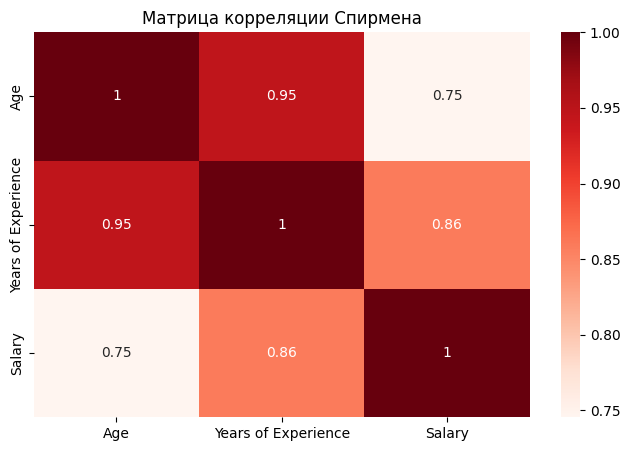

In [ ]:
corr_matrix = salary[["Age", "Years of Experience", "Salary"]].corr('spearman')
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

Получилось, что значения возраста, стажа и зарплаты довольно сильно коррелируют друг с другом

***Насколько влияет раса и пол на размер заработной платы?***

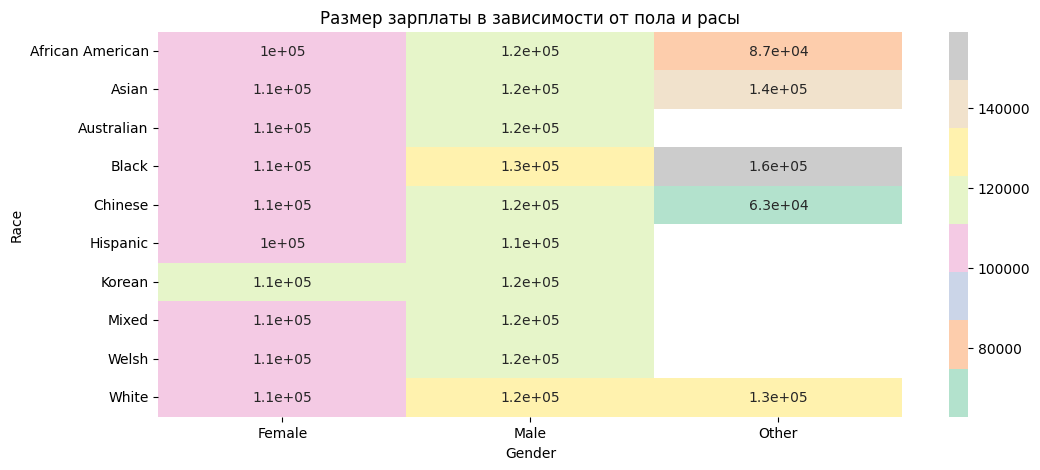

In [ ]:
salary_corr = pd.pivot_table(data=salary, index='Race', columns='Gender', values='Salary', aggfunc='mean')
plt.figure(figsize=[12,5])
sns.heatmap(salary_corr, annot=True, cmap='Pastel2')
plt.title("Размер зарплаты в зависимости от пола и расы")
plt.show()

Если проводить анализ только между мужчинами и женщинами, то у мужчин, вне зависимости от расы среднее значение ЗП выше на ~  10000. При этом размер зарплаты не зависит от расы у мужчин и женщин. А в категории "другие" наоборот, значительно сильно колеблется значение ЗП в зависимости от расы; думаю, что это связано, по большей части из-за небольшого количества данных по категории "другие".